<a href="https://colab.research.google.com/github/KevKil/SupLearn-WK-1/blob/main/Kevin_Kilonzo_IP_WK_1_Supervised_Learning_regression_(Machine_Learning).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Defining the Question

### a) Specifying the Question

You have been recruited as a football analyst in a company - Mchezopesa Ltd and tasked to accomplish the task below.

A prediction result of a game between team 1 and team 2, based on who's home and who's away, and on whether or not the game is friendly (include rank in your training).

You have two possible approaches (as  shown below) given the datasets that will be provided

Input: Home team, Away team, Tournament type (World cup, Friendly, Other)

### b) Defining the Metric for Success

To be able to make a prediction result of a game between team 1 and team 2, based on who's home and who's away, and on whether or not the game is friendly (include rank in your training).

### c) Understanding the context 

There are two datasets 
* Fifa rankings - Has features about rankings, confederations, team names and total points among other features
* Results - Has results about the matches played between teams and more features about the matches like home team, away team among other features

We can define the extent to which these factors affect the result of a match between two teams

### d) Recording the Experimental Design



1.  Reading the data
2.  Checking the data
3.  External data source validation
4.  Cleaning the data set
5.  Exploratory data analysis
6.  Performing Polynomial approach
7.  Performing the logistic approach
8.  Challenging the solution
9.  Follow up questions



### e) Data Relevance

**Fifa rankings dataset**

* Rank
* Country Abbreviation
* Total Points
* Previous Points
* Rank Change
* Average Previous Years Points
* Average Previous Years Points Weighted (50%)
* Average 2 Years Ago Points
* Average 2 Years Ago Points Weighted (30%)
* Average 3 Years Ago Points
* Average 3 Years Ago Points Weighted (20%)
* Confederation

**Results dataset**
* Date - date of the match
* Home_team - the name of the home team
* Away_team - the name of the away team
* Home_score - full-time home team score including extra time, not including penalty-shootouts
* Away_score - full-time away team score including extra time, not including penalty-shootouts
* Tournament - the name of the tournament
* City - the name of the city/town/administrative unit where the match was played
* Country - the name of the country where the match was played
* Neutral - TRUE/FALSE column indicating whether the match was played at a neutral venue


## 2. Reading the Data

In [428]:
# Importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [429]:
# Load fifa ranking dataset
ranking = pd.read_csv('fifa_ranking.csv')

In [430]:
# Load results dataset
result = pd.read_csv('results.csv')

## 3. Checking the Data

### Fifa ranking dataset

In [431]:
# Determining the no. of records in our dataset
#
ranking.shape

(57793, 16)

In [432]:
# Previewing the top of our dataset
#
ranking.head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08


In [433]:
# Previewing the bottom of our dataset
# 
ranking.tail()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
57788,206,Anguilla,AIA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2018-06-07
57789,206,Bahamas,BAH,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2018-06-07
57790,206,Eritrea,ERI,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07
57791,206,Somalia,SOM,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07
57792,206,Tonga,TGA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,OFC,2018-06-07


In [434]:
# Checking whether each column has an appropriate datatype
#
ranking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57793 entries, 0 to 57792
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   rank                     57793 non-null  int64  
 1   country_full             57793 non-null  object 
 2   country_abrv             57793 non-null  object 
 3   total_points             57793 non-null  float64
 4   previous_points          57793 non-null  int64  
 5   rank_change              57793 non-null  int64  
 6   cur_year_avg             57793 non-null  float64
 7   cur_year_avg_weighted    57793 non-null  float64
 8   last_year_avg            57793 non-null  float64
 9   last_year_avg_weighted   57793 non-null  float64
 10  two_year_ago_avg         57793 non-null  float64
 11  two_year_ago_weighted    57793 non-null  float64
 12  three_year_ago_avg       57793 non-null  float64
 13  three_year_ago_weighted  57793 non-null  float64
 14  confederation         

### Results dataset

In [435]:
# Determining the no. of records in our dataset
#
result.shape

(40839, 9)

In [436]:
# Previewing the top of our dataset
#
result.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [437]:
# Previewing the bottom of our dataset
# 
result.tail()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
40834,2019-07-18,American Samoa,Tahiti,8,1,Pacific Games,Apia,Samoa,True
40835,2019-07-18,Fiji,Solomon Islands,4,4,Pacific Games,Apia,Samoa,True
40836,2019-07-19,Senegal,Algeria,0,1,African Cup of Nations,Cairo,Egypt,True
40837,2019-07-19,Tajikistan,North Korea,0,1,Intercontinental Cup,Ahmedabad,India,True
40838,2019-07-20,Papua New Guinea,Fiji,1,1,Pacific Games,Apia,Samoa,True


In [438]:
# Checking whether each column has an appropriate datatype
#
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40839 entries, 0 to 40838
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        40839 non-null  object
 1   home_team   40839 non-null  object
 2   away_team   40839 non-null  object
 3   home_score  40839 non-null  int64 
 4   away_score  40839 non-null  int64 
 5   tournament  40839 non-null  object
 6   city        40839 non-null  object
 7   country     40839 non-null  object
 8   neutral     40839 non-null  bool  
dtypes: bool(1), int64(2), object(6)
memory usage: 2.5+ MB


## 4. External Data Source Validation

Checked the rankings against rankings contained in the [FIFA page](https://www.fifa.com/fifa-world-ranking/men?dateId=id13471)

## 5. Tidying the Dataset

### Fifa ranking dataset

In [439]:
# Checking column datatypes
ranking.dtypes

rank                         int64
country_full                object
country_abrv                object
total_points               float64
previous_points              int64
rank_change                  int64
cur_year_avg               float64
cur_year_avg_weighted      float64
last_year_avg              float64
last_year_avg_weighted     float64
two_year_ago_avg           float64
two_year_ago_weighted      float64
three_year_ago_avg         float64
three_year_ago_weighted    float64
confederation               object
rank_date                   object
dtype: object

In [440]:
# Changing rank date column to datetime
ranking.rank_date = pd.to_datetime(ranking.rank_date)

In [441]:
# Getting year and month from Rank date
ranking['year'] = pd.DatetimeIndex(ranking['rank_date']).year
ranking['month'] = pd.DatetimeIndex(ranking['rank_date']).month

In [442]:
# Checking the changes
ranking.dtypes

rank                                int64
country_full                       object
country_abrv                       object
total_points                      float64
previous_points                     int64
rank_change                         int64
cur_year_avg                      float64
cur_year_avg_weighted             float64
last_year_avg                     float64
last_year_avg_weighted            float64
two_year_ago_avg                  float64
two_year_ago_weighted             float64
three_year_ago_avg                float64
three_year_ago_weighted           float64
confederation                      object
rank_date                  datetime64[ns]
year                                int64
month                               int64
dtype: object

In [443]:
# Identifying the Missing Data
ranking.isna().sum()

rank                       0
country_full               0
country_abrv               0
total_points               0
previous_points            0
rank_change                0
cur_year_avg               0
cur_year_avg_weighted      0
last_year_avg              0
last_year_avg_weighted     0
two_year_ago_avg           0
two_year_ago_weighted      0
three_year_ago_avg         0
three_year_ago_weighted    0
confederation              0
rank_date                  0
year                       0
month                      0
dtype: int64

In [444]:
# Identifying the duplicated Data
ranking.duplicated().sum()

37

In [445]:
# Dropping duplicates
ranking = ranking.drop_duplicates()


In [446]:
# Checking if duplicates have been dropped
ranking.duplicated().sum()

0

In [447]:
# Selecting the necesaary columns
ranking_final = ranking[['rank','country_full','year','month']]

In [448]:
# Preview of the cleaned dataset
ranking_final

,rank,country_full,year,month
0,1,Germany,1993,8
1,2,Italy,1993,8
2,3,Switzerland,1993,8
3,4,Sweden,1993,8
4,5,Argentina,1993,8
...,...,...,...,...
57788,206,Anguilla,2018,6
57789,206,Bahamas,2018,6
57790,206,Eritrea,2018,6
57791,206,Somalia,2018,6


### Results dataset

In [449]:
# Checing column datatypes
result.dtypes

date          object
home_team     object
away_team     object
home_score     int64
away_score     int64
tournament    object
city          object
country       object
neutral         bool
dtype: object

In [450]:
# Changing date column to datetime
result.date = pd.to_datetime(result.date)

In [451]:
# Getting year and month from date
result['year'] = pd.DatetimeIndex(result['date']).year
result['month'] = pd.DatetimeIndex(result['date']).month

In [452]:
# Checking changes
result.dtypes

date          datetime64[ns]
home_team             object
away_team             object
home_score             int64
away_score             int64
tournament            object
city                  object
country               object
neutral                 bool
year                   int64
month                  int64
dtype: object

In [453]:
# Identifying the Missing Data
result.isna().sum()

date          0
home_team     0
away_team     0
home_score    0
away_score    0
tournament    0
city          0
country       0
neutral       0
year          0
month         0
dtype: int64

In [454]:
# Identifying the duplicated Data
result.duplicated().sum()

0

In [455]:
# As FIFA rankings started in 1993-08-08, the results before the date 1993-08-08 will be dropped
result = result.drop(result[result['date']<'1993-08-08'].index)


In [456]:
# Resetting indices after dropping columns and previewing dataset
result = result.reset_index(drop=True)
result.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,month
0,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,La Paz,Bolivia,False,1993,8
1,1993-08-08,Brazil,Mexico,1,1,Friendly,Maceió,Brazil,False,1993,8
2,1993-08-08,Ecuador,Venezuela,5,0,FIFA World Cup qualification,Quito,Ecuador,False,1993,8
3,1993-08-08,Guinea,Sierra Leone,1,0,Friendly,Conakry,Guinea,False,1993,8
4,1993-08-08,Paraguay,Argentina,1,3,FIFA World Cup qualification,Asunción,Paraguay,False,1993,8


In [457]:
# Selecting the necessary columns
result_final = result[['home_team', 'away_team', 'home_score', 'away_score','tournament','city','country','year','month']]

In [458]:
# Preview
result_final

,home_team,away_team,home_score,away_score,tournament,city,country,year,month
0,Bolivia,Uruguay,3,1,FIFA World Cup qualification,La Paz,Bolivia,1993,8
1,Brazil,Mexico,1,1,Friendly,Maceió,Brazil,1993,8
2,Ecuador,Venezuela,5,0,FIFA World Cup qualification,Quito,Ecuador,1993,8
3,Guinea,Sierra Leone,1,0,Friendly,Conakry,Guinea,1993,8
4,Paraguay,Argentina,1,3,FIFA World Cup qualification,Asunción,Paraguay,1993,8
...,...,...,...,...,...,...,...,...,...
22919,American Samoa,Tahiti,8,1,Pacific Games,Apia,Samoa,2019,7
22920,Fiji,Solomon Islands,4,4,Pacific Games,Apia,Samoa,2019,7
22921,Senegal,Algeria,0,1,African Cup of Nations,Cairo,Egypt,2019,7
22922,Tajikistan,North Korea,0,1,Intercontinental Cup,Ahmedabad,India,2019,7


In [459]:
# Creating new column for status
filters = [result.home_score>result.away_score,
           result.home_score<result.away_score,
           result.home_score==result.away_score
]
values = ['Win','Loss','Draw']

result_final['status'] = np.select(filters,values)
result_final.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,home_team,away_team,home_score,away_score,tournament,city,country,year,month,status
0,Bolivia,Uruguay,3,1,FIFA World Cup qualification,La Paz,Bolivia,1993,8,Win
1,Brazil,Mexico,1,1,Friendly,Maceió,Brazil,1993,8,Draw
2,Ecuador,Venezuela,5,0,FIFA World Cup qualification,Quito,Ecuador,1993,8,Win
3,Guinea,Sierra Leone,1,0,Friendly,Conakry,Guinea,1993,8,Win
4,Paraguay,Argentina,1,3,FIFA World Cup qualification,Asunción,Paraguay,1993,8,Loss


### Merged dataset

In [460]:
# Merging result and ranking to get home team ranking
home_rank= pd.merge(result_final, ranking_final,how = 'left',left_on=['home_team','year','month'],right_on=['country_full','year','month'])


In [461]:
# Preview of dataset
home_rank

,home_team,away_team,home_score,away_score,tournament,city,country,year,month,status,rank,country_full
0,Bolivia,Uruguay,3,1,FIFA World Cup qualification,La Paz,Bolivia,1993,8,Win,59.0,Bolivia
1,Brazil,Mexico,1,1,Friendly,Maceió,Brazil,1993,8,Draw,8.0,Brazil
2,Ecuador,Venezuela,5,0,FIFA World Cup qualification,Quito,Ecuador,1993,8,Win,35.0,Ecuador
3,Guinea,Sierra Leone,1,0,Friendly,Conakry,Guinea,1993,8,Win,65.0,Guinea
4,Paraguay,Argentina,1,3,FIFA World Cup qualification,Asunción,Paraguay,1993,8,Loss,67.0,Paraguay
...,...,...,...,...,...,...,...,...,...,...,...,...
22972,American Samoa,Tahiti,8,1,Pacific Games,Apia,Samoa,2019,7,Win,NaN,NaN
22973,Fiji,Solomon Islands,4,4,Pacific Games,Apia,Samoa,2019,7,Draw,NaN,NaN
22974,Senegal,Algeria,0,1,African Cup of Nations,Cairo,Egypt,2019,7,Loss,NaN,NaN
22975,Tajikistan,North Korea,0,1,Intercontinental Cup,Ahmedabad,India,2019,7,Loss,NaN,NaN


In [462]:
# Checking rows and columns 
home_rank.shape

(22977, 12)

In [463]:
home_rank.columns

Index(['home_team', 'away_team', 'home_score', 'away_score', 'tournament',
       'city', 'country', 'year', 'month', 'status', 'rank', 'country_full'],
      dtype='object')

In [464]:
# Renaming rank column to home team rank
home_rank = home_rank.rename(columns={'rank':'home_team_rank'})

In [465]:
# Merging Home rank and ranking to get away team ranking
away_rank= pd.merge(home_rank, ranking_final,how = 'left',left_on=['away_team','year','month'],right_on=['country_full','year','month'])

In [466]:
# Renaming rank column to away team rank
away_rank = away_rank.rename(columns={'rank':'away_team_rank'})

In [467]:
# Preview
away_rank.head(2)

,home_team,away_team,home_score,away_score,tournament,city,country,year,month,status,home_team_rank,country_full_x,away_team_rank,country_full_y
0,Bolivia,Uruguay,3,1,FIFA World Cup qualification,La Paz,Bolivia,1993,8,Win,59.0,Bolivia,22.0,Uruguay
1,Brazil,Mexico,1,1,Friendly,Maceió,Brazil,1993,8,Draw,8.0,Brazil,14.0,Mexico


In [468]:
# Preview
away_rank.tail(2)

,home_team,away_team,home_score,away_score,tournament,city,country,year,month,status,home_team_rank,country_full_x,away_team_rank,country_full_y
23076,Tajikistan,North Korea,0,1,Intercontinental Cup,Ahmedabad,India,2019,7,Loss,NaN,NaN,NaN,NaN
23077,Papua New Guinea,Fiji,1,1,Pacific Games,Apia,Samoa,2019,7,Draw,NaN,NaN,NaN,NaN


In [469]:
# Dropping country full column
away_rank = away_rank.drop(columns=['country_full_x','country_full_y'])

In [470]:
# Checking if columns are dropped
away_rank.columns

Index(['home_team', 'away_team', 'home_score', 'away_score', 'tournament',
       'city', 'country', 'year', 'month', 'status', 'home_team_rank',
       'away_team_rank'],
      dtype='object')

In [471]:
# Checking null values
away_rank.isna().sum()

home_team            0
away_team            0
home_score           0
away_score           0
tournament           0
city                 0
country              0
year                 0
month                0
status               0
home_team_rank    4392
away_team_rank    4483
dtype: int64

In [472]:
# Dropping the null values as they contain result info but do not contain ranking info
# This is because ranking info is up to 2018 June but result info is up to 2019 July
away_rank = away_rank.dropna()

In [473]:
# Checking if nulls have been dropped 
away_rank.isna().sum()

home_team         0
away_team         0
home_score        0
away_score        0
tournament        0
city              0
country           0
year              0
month             0
status            0
home_team_rank    0
away_team_rank    0
dtype: int64

In [474]:
# Checking duplicates
away_rank.duplicated().sum()

39

In [475]:
# Dropping dulpicates
away_rank = away_rank.drop_duplicates()

In [476]:
# Checking duplicates
away_rank.duplicated().sum()

0

In [477]:
# Checking changes
away_rank

,home_team,away_team,home_score,away_score,tournament,city,country,year,month,status,home_team_rank,away_team_rank
0,Bolivia,Uruguay,3,1,FIFA World Cup qualification,La Paz,Bolivia,1993,8,Win,59.0,22.0
1,Brazil,Mexico,1,1,Friendly,Maceió,Brazil,1993,8,Draw,8.0,14.0
2,Ecuador,Venezuela,5,0,FIFA World Cup qualification,Quito,Ecuador,1993,8,Win,35.0,94.0
3,Guinea,Sierra Leone,1,0,Friendly,Conakry,Guinea,1993,8,Win,65.0,86.0
4,Paraguay,Argentina,1,3,FIFA World Cup qualification,Asunción,Paraguay,1993,8,Loss,67.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
22146,Senegal,Colombia,0,1,FIFA World Cup,Samara,Russia,2018,6,Loss,27.0,16.0
22147,Panama,Tunisia,1,2,FIFA World Cup,Saransk,Russia,2018,6,Loss,55.0,21.0
22148,England,Belgium,0,1,FIFA World Cup,Kaliningrad,Russia,2018,6,Loss,12.0,3.0
22149,France,Argentina,4,3,FIFA World Cup,Kazan,Russia,2018,6,Win,7.0,5.0


In [478]:
# Checking column names
away_rank.columns

Index(['home_team', 'away_team', 'home_score', 'away_score', 'tournament',
       'city', 'country', 'year', 'month', 'status', 'home_team_rank',
       'away_team_rank'],
      dtype='object')

In [479]:
# Creating a copy
df= away_rank.copy()
df = df.reset_index(drop=True)

In [480]:
# Final dataframe for analysis
df

,home_team,away_team,home_score,away_score,tournament,city,country,year,month,status,home_team_rank,away_team_rank
0,Bolivia,Uruguay,3,1,FIFA World Cup qualification,La Paz,Bolivia,1993,8,Win,59.0,22.0
1,Brazil,Mexico,1,1,Friendly,Maceió,Brazil,1993,8,Draw,8.0,14.0
2,Ecuador,Venezuela,5,0,FIFA World Cup qualification,Quito,Ecuador,1993,8,Win,35.0,94.0
3,Guinea,Sierra Leone,1,0,Friendly,Conakry,Guinea,1993,8,Win,65.0,86.0
4,Paraguay,Argentina,1,3,FIFA World Cup qualification,Asunción,Paraguay,1993,8,Loss,67.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
16869,Senegal,Colombia,0,1,FIFA World Cup,Samara,Russia,2018,6,Loss,27.0,16.0
16870,Panama,Tunisia,1,2,FIFA World Cup,Saransk,Russia,2018,6,Loss,55.0,21.0
16871,England,Belgium,0,1,FIFA World Cup,Kaliningrad,Russia,2018,6,Loss,12.0,3.0
16872,France,Argentina,4,3,FIFA World Cup,Kazan,Russia,2018,6,Win,7.0,5.0


## 6. Exploratory Analysis

In [481]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16874 entries, 0 to 16873
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   home_team       16874 non-null  object 
 1   away_team       16874 non-null  object 
 2   home_score      16874 non-null  int64  
 3   away_score      16874 non-null  int64  
 4   tournament      16874 non-null  object 
 5   city            16874 non-null  object 
 6   country         16874 non-null  object 
 7   year            16874 non-null  int64  
 8   month           16874 non-null  int64  
 9   status          16874 non-null  object 
 10  home_team_rank  16874 non-null  float64
 11  away_team_rank  16874 non-null  float64
dtypes: float64(2), int64(4), object(6)
memory usage: 1.5+ MB


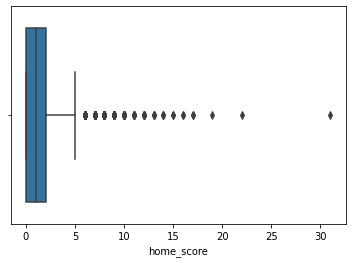

In [482]:
# Checking for outliers
sns.boxplot(data=df,x='home_score')


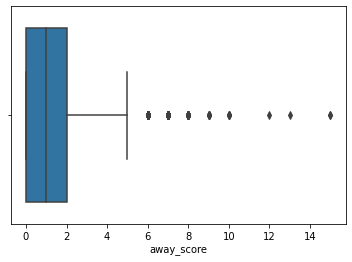

In [483]:
sns.boxplot(data=df,x='away_score')


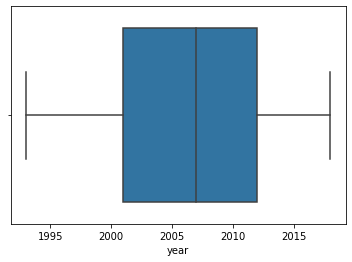

In [484]:
sns.boxplot(data=df,x='year')


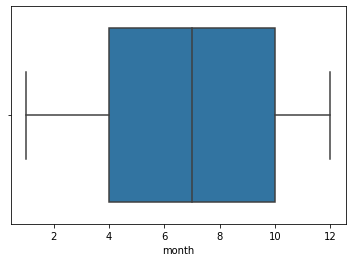

In [485]:
sns.boxplot(data=df,x='month')


From observations home score and away score has presence of outliers which are highly unlikely thus will remove them by setting goals conceded to a maximum of 10

In [486]:
# Removing outliers
df= df[df['home_score']<=10]
df= df[df['away_score']<=10]

In [487]:
# Checking if ouliers have been removed
print(df['home_score'].unique())
print(df['away_score'].unique())

[ 3  1  5  0  4  2  7  6  8 10  9]
[ 1  0  3  7  2  5  4  8  9  6 10]


In [488]:
# Checking summary statistics
df.describe()

,home_score,away_score,year,month,home_team_rank,away_team_rank
count,16837.000000,16837.000000,16837.000000,16837.00000,16837.000000,16837.000000
mean,1.580923,1.068064,2006.504959,6.88062,75.940013,78.664786
std,1.513364,1.230309,6.803267,3.27358,50.815464,51.820164
min,0.000000,0.000000,1993.000000,1.00000,1.000000,1.000000
25%,0.000000,0.000000,2001.000000,4.00000,33.000000,35.000000
50%,1.000000,1.000000,2007.000000,7.00000,70.000000,72.000000
75%,2.000000,2.000000,2012.000000,10.00000,111.000000,115.000000
max,10.000000,10.000000,2018.000000,12.00000,209.000000,209.000000


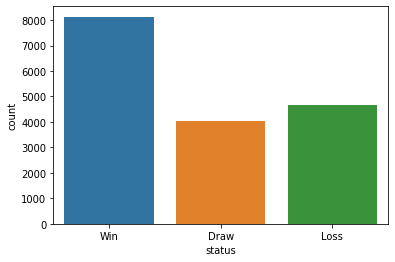

In [489]:
# Count plot of status
sns.countplot(data=df,x='status')

Majority of the home teams won their home games

In [490]:
# Frequency table of countries
df.groupby('country')['country'].count().sort_values(ascending=False)[0:11]

country
United States           571
France                  319
South Africa            318
Qatar                   280
United Arab Emirates    269
Saudi Arabia            213
England                 201
Thailand                196
Austria                 191
Japan                   191
Oman                    187
Name: country, dtype: int64

The country with the most games played in is United States

In [491]:
# Frequency table of cities
df.groupby('city')['city'].count().sort_values(ascending=False)[0:11]

city
Doha           253
Muscat         173
Bangkok        160
Kuwait City    148
London         140
Attard         138
Abu Dhabi      134
Amman          134
Kampala        126
Dublin         125
Kigali         118
Name: city, dtype: int64

The city with the most games played in is Doha in Qatar

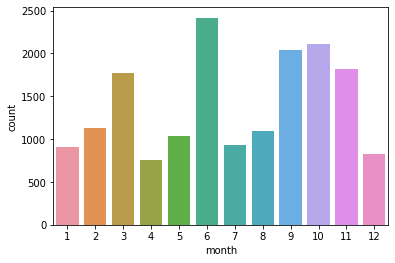

In [492]:
# Count plot of games per month
sns.countplot(data=df, x='month')

Most of the games are played in the month of June. This is due to the period of most international football tournaments are in the month of June and the domestic football seasons in most countries are over

In [493]:
# Frequency plot of games per year
df.groupby('year')['year'].count().sort_values(ascending=False)[0:11]

year
2011    866
2004    864
2008    862
2000    833
2012    817
2013    816
2001    807
2007    799
2015    770
2017    746
2003    739
Name: year, dtype: int64

Most of the games were played in 2011

In [494]:
# Frequency plot of tornament type
df.groupby('tournament')['tournament'].count().sort_values(ascending=False)[0:11]

tournament
Friendly                                6421
FIFA World Cup qualification            3927
UEFA Euro qualification                 1381
African Cup of Nations qualification     871
AFC Asian Cup qualification              384
CECAFA Cup                               310
African Cup of Nations                   278
Copa América                             225
COSAFA Cup                               222
African Nations Championship             186
AFF Championship                         177
Name: tournament, dtype: int64

Most common game played is Friendlies which are palyed throughout the year and can be arranged anytime

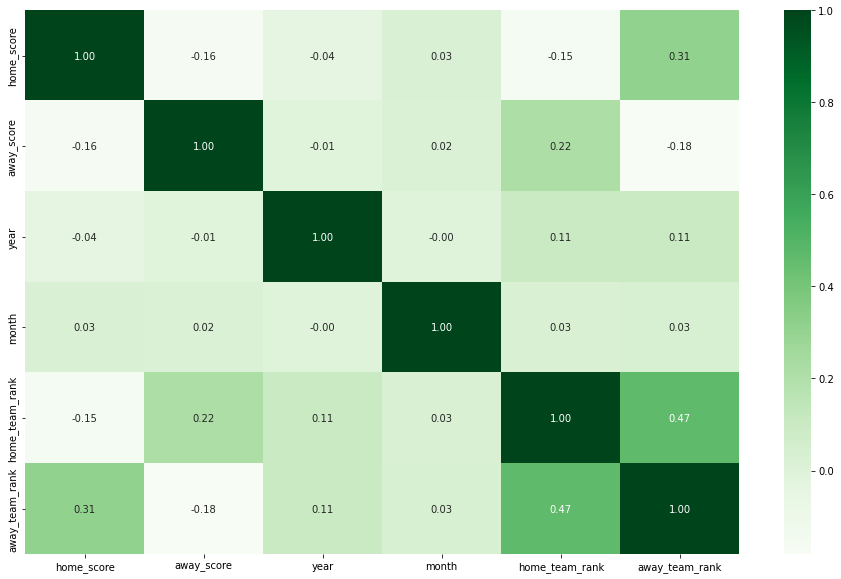

In [496]:
# Checking correlations
plt.figure(figsize=(16,10))
sns.heatmap(df.corr(),annot=True,cmap="Greens",fmt=".2f");
plt.show()

Home team rank and away team rank are positively related

## 7. a) Implementing the Solution(Polynomial)

### Model 1 
Predicting home team goals given 
* Rank of home team
* Rank of away team
* Tournament type

In [498]:
# Creating data frame for analysis
m_1= df[['home_team_rank','away_team_rank','tournament','home_score']]

In [499]:
# Preview of the dataset
m_1.head(2)

,home_team_rank,away_team_rank,tournament,home_score
0,59.0,22.0,FIFA World Cup qualification,3
1,8.0,14.0,Friendly,1


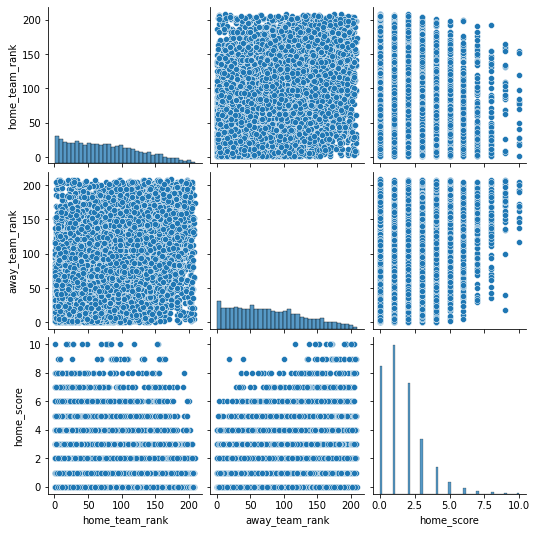

In [500]:
# Checking scatter plots of the numerical variables
sns.pairplot(m_1)

In [501]:
# Checking correlations between the columns
m_1.corr()

,home_team_rank,away_team_rank,home_score
home_team_rank,1.000000,0.469169,-0.154559
away_team_rank,0.469169,1.000000,0.308687
home_score,-0.154559,0.308687,1.000000


In [502]:
# Converting the tornament column to numerical
torna = pd.get_dummies(df['tournament'],drop_first=True)
torna.head()

,AFC Asian Cup,AFC Asian Cup qualification,AFC Challenge Cup,AFC Challenge Cup qualification,AFF Championship,African Cup of Nations,African Cup of Nations qualification,African Nations Championship,Amílcar Cabral Cup,Baltic Cup,CECAFA Cup,CFU Caribbean Cup,CFU Caribbean Cup qualification,COSAFA Cup,Confederations Cup,Copa América,Copa América qualification,Copa Paz del Chaco,Copa del Pacífico,Cyprus International Tournament,Dragon Cup,Dunhill Cup,Dynasty Cup,EAFF Championship,FIFA World Cup,FIFA World Cup qualification,Friendly,Gold Cup,Gold Cup qualification,Gulf Cup,Intercontinental Cup,King Hassan II Tournament,King's Cup,Kirin Cup,Korea Cup,Lunar New Year Cup,Malta International Tournament,Merdeka Tournament,Millennium Cup,Nations Cup,Nehru Cup,Nile Basin Tournament,Nordic Championship,OSN Cup,Oceania Nations Cup,Oceania Nations Cup qualification,Pacific Games,Prime Minister's Cup,SAFF Cup,SKN Football Festival,Simba Tournament,South Pacific Games,Tournoi de France,UAFA Cup,UAFA Cup qualification,UEFA Euro,UEFA Euro qualification,UNCAF Cup,UNIFFAC Cup,USA Cup,United Arab Emirates Friendship Tournament,VFF Cup,WAFF Championship,Windward Islands Tournament
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [503]:
# Droping tornament categorical column
m_1= m_1.drop(columns='tournament')

In [504]:
# Checking changes
m_1.head(2)

,home_team_rank,away_team_rank,home_score
0,59.0,22.0,3
1,8.0,14.0,1


In [505]:
# Concat m_1 and torna dataframes
mod_1 = pd.concat([m_1,torna],axis=1)

In [506]:
# Preview of the merged dataframe
mod_1

,home_team_rank,away_team_rank,home_score,AFC Asian Cup,AFC Asian Cup qualification,AFC Challenge Cup,AFC Challenge Cup qualification,AFF Championship,African Cup of Nations,African Cup of Nations qualification,African Nations Championship,Amílcar Cabral Cup,Baltic Cup,CECAFA Cup,CFU Caribbean Cup,CFU Caribbean Cup qualification,COSAFA Cup,Confederations Cup,Copa América,Copa América qualification,Copa Paz del Chaco,Copa del Pacífico,Cyprus International Tournament,Dragon Cup,Dunhill Cup,Dynasty Cup,EAFF Championship,FIFA World Cup,FIFA World Cup qualification,Friendly,Gold Cup,Gold Cup qualification,Gulf Cup,Intercontinental Cup,King Hassan II Tournament,King's Cup,Kirin Cup,Korea Cup,Lunar New Year Cup,Malta International Tournament,Merdeka Tournament,Millennium Cup,Nations Cup,Nehru Cup,Nile Basin Tournament,Nordic Championship,OSN Cup,Oceania Nations Cup,Oceania Nations Cup qualification,Pacific Games,Prime Minister's Cup,SAFF Cup,SKN Football Festival,Simba Tournament,South Pacific Games,Tournoi de France,UAFA Cup,UAFA Cup qualification,UEFA Euro,UEFA Euro qualification,UNCAF Cup,UNIFFAC Cup,USA Cup,United Arab Emirates Friendship Tournament,VFF Cup,WAFF Championship,Windward Islands Tournament
0,59.0,22.0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,8.0,14.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,35.0,94.0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,65.0,86.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,67.0,5.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16869,27.0,16.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
16870,55.0,21.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
16871,12.0,3.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
16872,7.0,5.0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [322]:
#  Splitting our dataset
#
X = mod_1.drop(["home_score"],axis=1).values
y = mod_1["home_score"].values


In [323]:
# Importing libraries 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression


In [324]:
# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state=0)

In [325]:
# Fit polynomial Regression to the dataset
poly_reg = PolynomialFeatures(degree = 2) 
X_poly = poly_reg.fit_transform(X)


pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)

LinearRegression()

In [326]:
# get the predictions 
poly_arr_pred = pol_reg.predict(poly_reg.fit_transform(X_test))

In [327]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': poly_arr_pred})
df

,Actual,Predicted
0,0,2.168213
1,0,1.074224
2,3,1.472626
3,1,1.114787
4,0,0.861518
...,...,...
3370,2,1.485922
3371,0,1.843261
3372,0,0.894522
3373,0,1.485981


In [328]:
# Evaluating the Algorithm
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, poly_arr_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, poly_arr_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, poly_arr_pred)))

Mean Absolute Error: 1.039056327661523
Mean Squared Error: 1.943778330140344
Root Mean Squared Error: 1.3941945094355894


As the RMSE of the model is greater than 10% of the mean means our model is not good at predicting goals

### Challenging the solution

In [329]:
# Getting the residuals
residuals = np.subtract(poly_arr_pred, y_test)

# Let's describe our residual:
pd.DataFrame(residuals).describe()

residuals.mean()

0.002124333895047277

In [330]:
pd.DataFrame(residuals).describe()

,0
count,3375.000000
mean,0.002124
std,1.394399
min,-11.732347
25%,-0.691599
50%,0.225809
75%,0.945915
max,4.490232


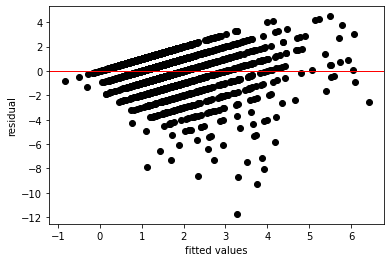

In [332]:
import matplotlib.pyplot as plt

plt.scatter(poly_arr_pred, residuals, color='black')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='red', linewidth=1)
plt.show()

In [334]:
import scipy as sp

test_result, p_value = sp.stats.bartlett(poly_arr_pred, residuals)

# To interpret the results we must also compute a critical value of the chi squared distribution
degree_of_freedom = len(y_pred)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print(critical_value)

# If the test_result is greater than the critical value, then we reject our null
# hypothesis. This would mean that there are patterns to the variance of the data

# Otherwise, we can identify no patterns, and we accept the null hypothesis that 
# the variance is homogeneous across our data

if (test_result > critical_value):
  print('the variances are unequal, and the model should be reassessed')
else:
  print('the variances are homogeneous!')

inf
the variances are homogeneous!


In conclusion the model is homoskedatic but the prediction accuracy is very low hence would recommend another type of regression or model

## 7. b)Implementing the Solution
Approach 2: Logistic approach

Feature Engineering: Figure out from the home team’s perspective if the game is a Win, Lose or Draw (W, L, D)

In [298]:
df.columns

Index(['home_team', 'away_team', 'home_score', 'away_score', 'tournament',
       'city', 'country', 'year', 'month', 'status', 'home_team_rank',
       'away_rank_rank'],
      dtype='object')

In [507]:
data = df.drop(columns=['home_team', 'away_team','city', 'country','year', 'month'])
data

,home_score,away_score,tournament,status,home_team_rank,away_team_rank
0,3,1,FIFA World Cup qualification,Win,59.0,22.0
1,1,1,Friendly,Draw,8.0,14.0
2,5,0,FIFA World Cup qualification,Win,35.0,94.0
3,1,0,Friendly,Win,65.0,86.0
4,1,3,FIFA World Cup qualification,Loss,67.0,5.0
...,...,...,...,...,...,...
16869,0,1,FIFA World Cup,Loss,27.0,16.0
16870,1,2,FIFA World Cup,Loss,55.0,21.0
16871,0,1,FIFA World Cup,Loss,12.0,3.0
16872,4,3,FIFA World Cup,Win,7.0,5.0


In [508]:
# Converting the tornament column to numerical
torna = pd.get_dummies(data['tournament'],drop_first=True)
torna.head()

,AFC Asian Cup,AFC Asian Cup qualification,AFC Challenge Cup,AFC Challenge Cup qualification,AFF Championship,African Cup of Nations,African Cup of Nations qualification,African Nations Championship,Amílcar Cabral Cup,Baltic Cup,CECAFA Cup,CFU Caribbean Cup,CFU Caribbean Cup qualification,COSAFA Cup,Confederations Cup,Copa América,Copa América qualification,Copa Paz del Chaco,Copa del Pacífico,Cyprus International Tournament,Dragon Cup,Dunhill Cup,Dynasty Cup,EAFF Championship,FIFA World Cup,FIFA World Cup qualification,Friendly,Gold Cup,Gold Cup qualification,Gulf Cup,Intercontinental Cup,King Hassan II Tournament,King's Cup,Kirin Cup,Korea Cup,Lunar New Year Cup,Malta International Tournament,Merdeka Tournament,Millennium Cup,Nations Cup,Nehru Cup,Nile Basin Tournament,Nordic Championship,OSN Cup,Oceania Nations Cup,Oceania Nations Cup qualification,Pacific Games,Prime Minister's Cup,SAFF Cup,SKN Football Festival,Simba Tournament,South Pacific Games,Tournoi de France,UAFA Cup,UAFA Cup qualification,UEFA Euro,UEFA Euro qualification,UNCAF Cup,UNIFFAC Cup,USA Cup,United Arab Emirates Friendship Tournament,VFF Cup,WAFF Championship,Windward Islands Tournament
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [509]:
# Droping tornament numerical column
data= data.drop(columns='tournament')

In [510]:
# Checking changes
data.head(2)

,home_score,away_score,status,home_team_rank,away_team_rank
0,3,1,Win,59.0,22.0
1,1,1,Draw,8.0,14.0


In [511]:
data.corr()

,home_score,away_score,home_team_rank,away_team_rank
home_score,1.000000,-0.162431,-0.154559,0.308687
away_score,-0.162431,1.000000,0.220141,-0.181168
home_team_rank,-0.154559,0.220141,1.000000,0.469169
away_team_rank,0.308687,-0.181168,0.469169,1.000000


In [512]:
# Concat m_1 and torna dataframes
mod = pd.concat([data,torna],axis=1)

In [513]:
mod.head(2)

,home_score,away_score,status,home_team_rank,away_team_rank,AFC Asian Cup,AFC Asian Cup qualification,AFC Challenge Cup,AFC Challenge Cup qualification,AFF Championship,African Cup of Nations,African Cup of Nations qualification,African Nations Championship,Amílcar Cabral Cup,Baltic Cup,CECAFA Cup,CFU Caribbean Cup,CFU Caribbean Cup qualification,COSAFA Cup,Confederations Cup,Copa América,Copa América qualification,Copa Paz del Chaco,Copa del Pacífico,Cyprus International Tournament,Dragon Cup,Dunhill Cup,Dynasty Cup,EAFF Championship,FIFA World Cup,FIFA World Cup qualification,Friendly,Gold Cup,Gold Cup qualification,Gulf Cup,Intercontinental Cup,King Hassan II Tournament,King's Cup,Kirin Cup,Korea Cup,Lunar New Year Cup,Malta International Tournament,Merdeka Tournament,Millennium Cup,Nations Cup,Nehru Cup,Nile Basin Tournament,Nordic Championship,OSN Cup,Oceania Nations Cup,Oceania Nations Cup qualification,Pacific Games,Prime Minister's Cup,SAFF Cup,SKN Football Festival,Simba Tournament,South Pacific Games,Tournoi de France,UAFA Cup,UAFA Cup qualification,UEFA Euro,UEFA Euro qualification,UNCAF Cup,UNIFFAC Cup,USA Cup,United Arab Emirates Friendship Tournament,VFF Cup,WAFF Championship,Windward Islands Tournament
0,3,1,Win,59.0,22.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1,Draw,8.0,14.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [310]:
#  Splitting our dataset
#
X = mod.drop(["status"],axis=1).values
y = mod["status"].values

In [311]:
# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state=0)

In [312]:
# Fit polynomial Regression to the dataset
from sklearn.linear_model import LogisticRegression
LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [313]:
# We can also get the predictions as an array
y_pred = LogReg.predict(X_test)

In [314]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix


array([[ 786,    0,    0],
       [   0,  935,    0],
       [   0,    0, 1654]])

In [317]:
#Printing the metrics to get the performance of the model on test data:
print("Accuracy on Test Data:",LogReg.score(X_test, y_test )* 100)

Accuracy on Test Data: 100.0


As the accuracy of the model is at maximum there is no need for more fine tuning

## 9. Follow up questions

> At this point, we can refine our question or collect new data, all in an iterative process to get at the truth.



### a). Did we have the right data?

Yes the data was correct and verified

### b). Do we need other data to answer our question?

No the data was sufficient but more could be collected so that the data could be up to date

### c). Did we have the right question?

The question chosen was correct but the method chosen for supervised learning can be checked and refined